# PID - Pole Placement

Objectives: 
- Design PID controllers using analytical approach
- Place closed-loop poles to meet design requirements
- Start looking at "Gang of 4". (Sensitivity and Complementary Sensitivity are two of the Gang of 4)

![PID feedback loop](PIDcontrolLoop.jpg "PID feedback loop")

*In the tutorial we derived that there are only $4$ transfer functions that define all the behaviors that we are interested in! From the figure of a closed loop system, the following expressions can be derived
$$
\begin{align*}
Y(s) &= \frac{P(s)K(s)}{1 + P(s)K(s)}R(s) + \frac{P(s)}{1 + P(s)K(s)}D(s) - \frac{P(s)K(s)}{1 + P(s)K(s)}N(s), \\
U(s) &= \frac{K(s)}{1 + P(s)K(s)}R(s) + \frac{1}{1 + P(s)K(s)}D(s) - \frac{K(s)}{1 + P(s)K(s)}N(s),  \\
\mathcal{E}(s) &= \frac{1}{1 + P(s)K(s)}R(s) - \frac{P(s)}{1 + P(s)K(s)}D(s) + \frac{P(s)K(s)}{1 + P(s)K(s)}N(s), 
\end{align*}
$$
where there are only 4 transfer functions to consider (i.e. the Gang of 4):
$$
\begin{align*}
S(s) &= \frac{1}{1 + P(s)K(s)} \\
T(s) &= \frac{P(s)K(s)}{1 + P(s)K(s)} \\
S(S)P(s) &= \frac{P(s)}{1 + P(s)K(s)} \\
S(s)K(s) &= \frac{K(s)}{1 + P(s)K(s)} 
\end{align*}
$$

# Transfer function of PID controller

Recall the form of the PID controller:

\begin{align*}
u_K(t) &= K(t)*\varepsilon(t) \\
 &= \underbrace{K_p \varepsilon_m(t)}_{\substack{\text{Proportional} \\ \text{Control} \\ \text{Action}}} + \underbrace{K_i \int_0^{t}\varepsilon_m(\tau) d\tau}_{\substack{\text{Integral} \\ \text{Control} \\ \text{action}}}+ \underbrace{ K_d \frac{d}{dt} \varepsilon_m(t)}_{\substack{\text{Derivative} \\ \text{Control} \\ \text{action}}}
\end{align*}

In Laplace domain:
$$
\begin{align*}
U_K(s) &= K(s)\mathcal{E}_m(s) \\
 &= K_p \mathcal{E}_m(s)  + \frac{K_i}{s} \mathcal{E}_m(s)  + K_d \mathcal{E}_m(s)s
\end{align*}
$$

We can gather all the terms and write the PID controller as a transfer function:
$$
\begin{align*}
K(s) &= K_p   + \frac{K_i}{s}  + K_d s \\
& = \frac{K_ps + K_i + K_d s^2 }{s} 
\end{align*}
$$

Observation: A PID controller consists of 2 zeros that can be placed anywhere (could be complex or real) and a pole at $0$.

# PID control of a second order plant

Consider a plant
$$
\begin{align*}
P(s) &= \frac{1}{(s+a_1)(s+a_2)}
\end{align*}
$$

For a second order plant, a PID controller can be used to obtain a loop transfer function of $\frac{k_{\ell}}{s}$ for any $k_{\ell}$! 

Observe:
$$
\begin{align*}
L(s) &= K(s)P(s) \\
&= \frac{K_ps + K_i + K_d s^2 }{s} \frac{1}{(s+a_1)(s+a_2)} \\
&= \frac{K_d( s^2 + \frac{K_p}{K_d}s + \frac{K_i}{K_d})}{s(s^2 + (a_1+a_2)s + a_1a_2)}
\end{align*}
$$

Choosing
$$
\begin{align*}
K_d &= k_{\ell} \\
\frac{K_p}{K_d} &= (a_1+a_2) \\
\frac{K_i}{K_d} &= a_1a_2
\end{align*}
$$
results in the following:
$$
\begin{align*}
L(s) = \frac{k_{\ell}}{s}
\end{align*}
$$

In [6]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

plt.rcParams['text.usetex'] = True

In [12]:
P_poles = [1-1j, 1+1j]
P = ct.tf(1,[1, 2, 2])

Kl_1 = 1
Kl_2 = 10
Kl_3 = 100


def get_PID_coeff(Kl_desired, P_poles):
    Kd = Kl_desired
    Kp = np.real(P_poles[0] + P_poles[1])*Kd
    Ki = np.real(P_poles[0]*P_poles[1])*Kd
    return Kp, Kd, Ki

Kp1, Kd1, Ki1 = get_PID_coeff(Kl_1, P_poles)
Kp2, Kd2, Ki2 = get_PID_coeff(Kl_2, P_poles)
Kp3, Kd3, Ki3 = get_PID_coeff(Kl_3, P_poles)

K1 = ct.tf(Kp1, 1) + ct.tf([Kd1, 0],[0.001, 1]) + ct.tf(Ki1,[1, 0])
K2 = ct.tf(Kp2, 1) + ct.tf([Kd2, 0],[0.001, 1]) + ct.tf(Ki2,[1, 0])
K3 = ct.tf(Kp3, 1) + ct.tf([Kd3, 0],[0.001, 1]) + ct.tf(Ki3,[1, 0])

T1 = P*K1/(1+P*K1)
T2 = P*K2/(1+P*K2)
T3 = P*K3/(1+P*K3)

S1 = 1/(1+P*K1)
S2 = 1/(1+P*K2)
S3 = 1/(1+P*K3)

SK1 = K1*S1 
SK2 = K2*S2 
SK3 = K3*S3    

SP1 = P*S1 
SP2 = P*S2 
SP3 = P*S3

Text(514.7688297046341, 0.5, 'Magnitude')

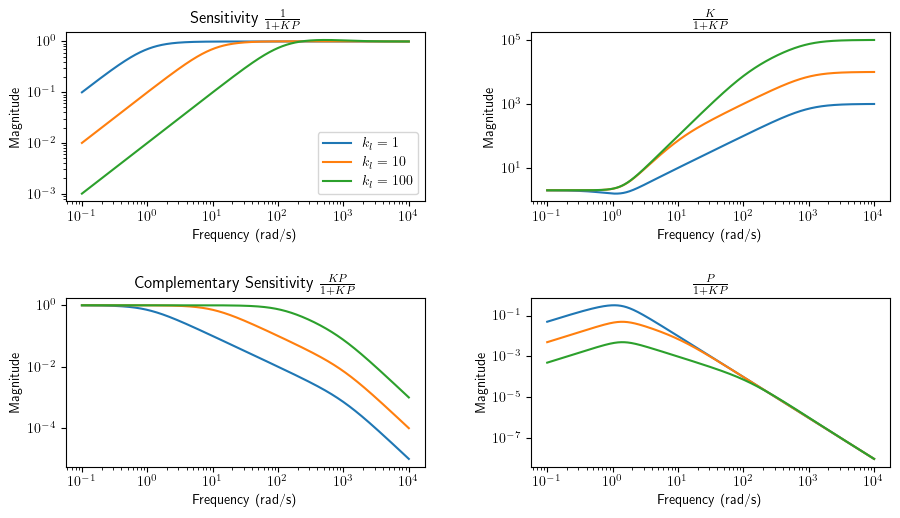

In [13]:

mag_S, phase_S, w_S = ct.bode_plot([S1,S2,S3],plot=False)
mag_T, phase_T, w_T = ct.bode_plot([T1,T2,T3],plot=False)
mag_SK, phase_SK, w_SK = ct.bode_plot([SK1,SK2,SK3],plot=False)
mag_SP, phase_SP, w_SP = ct.bode_plot([SP1,SP2,SP3],plot=False)

fig, ax = plt.subplots(2,2, figsize=(10,6))
fig.tight_layout(pad=5.0)
ax[0,0].loglog(w_S[0],mag_S[0], label=r'$k_l=1$')
ax[0,0].loglog(w_S[1],mag_S[1], label=r'$k_l=10$')
ax[0,0].loglog(w_S[2],mag_S[2], label=r'$k_l=100$')
ax[0,0].set_title(r'Sensitivity $\frac{1}{1+KP}$')
ax[0,0].legend()
ax[0,0].set_xlabel('Frequency (rad/s)')
ax[0,0].set_ylabel('Magnitude')

ax[1,0].loglog(w_T[0],mag_T[0])
ax[1,0].loglog(w_T[1],mag_T[1])
ax[1,0].loglog(w_T[2],mag_T[2])
ax[1,0].set_title(r'Complementary Sensitivity $\frac{KP}{1+KP}$')
ax[1,0].set_xlabel('Frequency (rad/s)')
ax[1,0].set_ylabel('Magnitude')

ax[0,1].loglog(w_SK[0],mag_SK[0])
ax[0,1].loglog(w_SK[1],mag_SK[1])
ax[0,1].loglog(w_SK[2],mag_SK[2])
ax[0,1].set_title(r'$\frac{K}{1+KP}$')
ax[0,1].set_xlabel('Frequency (rad/s)')
ax[0,1].set_ylabel('Magnitude')

ax[1,1].loglog(w_SP[0],mag_SP[0])
ax[1,1].loglog(w_SP[1],mag_SP[1])
ax[1,1].loglog(w_SP[2],mag_SP[2])
ax[1,1].set_title(r'$\frac{P}{1+KP}$')
ax[1,1].set_xlabel('Frequency (rad/s)')
ax[1,1].set_ylabel('Magnitude')

# Observations

- Sensitivity and Complementary Sensitivity functions look great!
- Based on these two plots, it appears we can set the bandwidth of the closed-loop system anywhere we want!
- What is the cost?
- Look at $\frac{K}{1 + KP}$ plot. What does this tell us? What is the cost?
- What does the $\frac{P}{1 + KP}$ plot tell us? 

Text(0.5, 104.42267123557922, 'Time (s)')

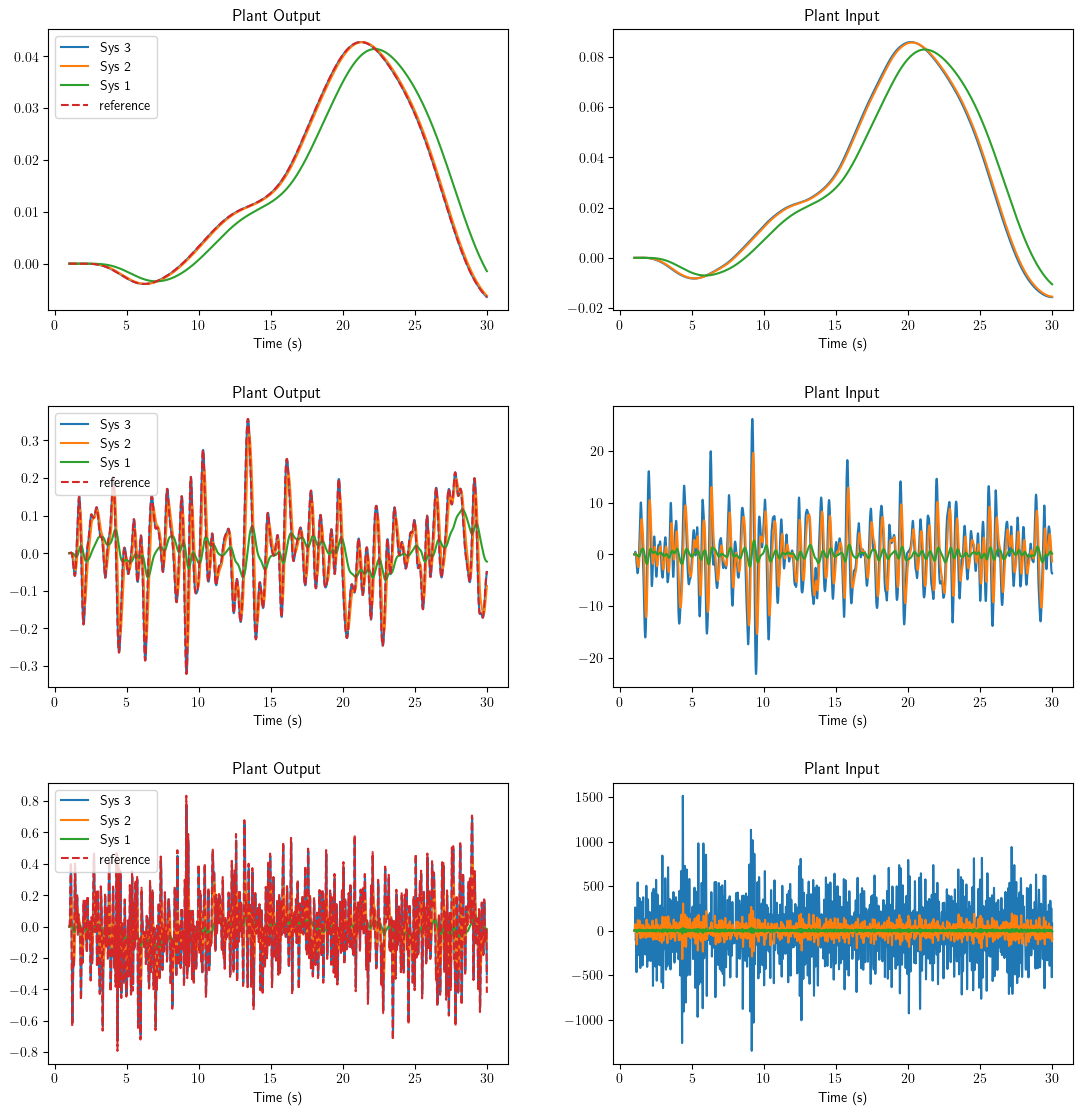

In [23]:
# Calculate responses to low, med and high freq signals

b1, a1 = sp.signal.butter(5, 0.0005, 'low')
b2, a2 = sp.signal.butter(5, 0.01, 'low')
b3, a3 = sp.signal.butter(5, 0.05, 'low')

N = 10000
r1 = sp.signal.lfilter(b1, a1, np.random.randn(N))
r2 = sp.signal.lfilter(b2, a2, np.random.randn(N))
r3 = sp.signal.lfilter(b3, a3, np.random.randn(N))

t = np.linspace(1,30,N)
t,y1_r1 = ct.forced_response(T1,t,r1)
t,y2_r1 = ct.forced_response(T2,t,r1)
t,y3_r1 = ct.forced_response(T3,t,r1)

t,u1_r1 = ct.forced_response(SK1,t,r1)
t,u2_r1 = ct.forced_response(SK2,t,r1)
t,u3_r1 = ct.forced_response(SK3,t,r1)

t,y1_r2 = ct.forced_response(T1,t,r2)
t,y2_r2 = ct.forced_response(T2,t,r2)
t,y3_r2 = ct.forced_response(T3,t,r2)

t,u1_r2 = ct.forced_response(SK1,t,r2)
t,u2_r2 = ct.forced_response(SK2,t,r2)
t,u3_r2 = ct.forced_response(SK3,t,r2)

t,y1_r3 = ct.forced_response(T1,t,r3)
t,y2_r3 = ct.forced_response(T2,t,r3)
t,y3_r3 = ct.forced_response(T3,t,r3)

t,u1_r3 = ct.forced_response(SK1,t,r3)
t,u2_r3 = ct.forced_response(SK2,t,r3)
t,u3_r3 = ct.forced_response(SK3,t,r3)

fig,ax = plt.subplots(3,2, figsize=(12,12))
fig.tight_layout(pad=5.0)

ax[0,0].plot(t,y3_r1, label='Sys 3')
ax[0,0].plot(t,y2_r1, label='Sys 2')
ax[0,0].plot(t,y1_r1, label='Sys 1')
ax[0,0].plot(t,r1, '--', label='reference')
ax[0,0].legend()
ax[0,0].set_title('Plant Output')
ax[0,0].set_xlabel('Time (s)')

ax[0,1].plot(t,u3_r1, label='T3')
ax[0,1].plot(t,u2_r1, label='T2')
ax[0,1].plot(t,u1_r1, label='T1')
ax[0,1].set_title('Plant Input')
ax[0,1].set_xlabel('Time (s)')

ax[1,0].plot(t,y3_r2, label='Sys 3')
ax[1,0].plot(t,y2_r2, label='Sys 2')
ax[1,0].plot(t,y1_r2, label='Sys 1')
ax[1,0].plot(t,r2, '--', label='reference')
ax[1,0].legend()
ax[1,0].set_title('Plant Output')
ax[1,0].set_xlabel('Time (s)')

ax[1,1].plot(t,u3_r2, label='T3')
ax[1,1].plot(t,u2_r2, label='T2')
ax[1,1].plot(t,u1_r2, label='T1')
ax[1,1].set_title('Plant Input')
ax[1,1].set_xlabel('Time (s)')

ax[2,0].plot(t,y3_r3, label='Sys 3')
ax[2,0].plot(t,y2_r3, label='Sys 2')
ax[2,0].plot(t,y1_r3, label='Sys 1')
ax[2,0].plot(t,r3, '--', label='reference')
ax[2,0].legend()
ax[2,0].set_title('Plant Output')
ax[2,0].set_xlabel('Time (s)')

ax[2,1].plot(t,u3_r3, label='T3')
ax[2,1].plot(t,u2_r3, label='T2')
ax[2,1].plot(t,u1_r3, label='T1')
ax[2,1].set_title('Plant Input')
ax[2,1].set_xlabel('Time (s)')


# Conclusions

The price we pay for increasing the bandwidth (when the plant is a second order system, and the controller is PID) is larger actuation signal are required. 

Is this a general statement, or is it unique to PID?

The transfer function from $r$ to $u$ is:
$$
\begin{align*}
S(s)K(s) &= \frac{1}{1 + P(s)K(s)} K(s) \\
&= \frac{1}{1 + \frac{1}{A(s)} \frac{K_ps + K_i + K_d s^2 }{s}} \frac{K_ps + K_i + K_d s^2 }{s} 
\end{align*}
$$
But we designed ${K_ps + K_i + K_d s^2 }$ to cancel out $A(s)$, so we have:
$$
\begin{align*}
S(s)K(s) &= \frac{1}{1 + \frac{K_d}{s}} \frac{K_ps + K_i + K_d s^2 }{s} \\
&= \frac{s}{s + K_d} \frac{K_ps + K_i + K_d s^2 }{s}. 
\end{align*}
$$
So we see that for a PID controller designed to cancel out the plant poles, $S(s)K(s)$ has more zeros than poles, so the Bode plot of $S(s)K(s)$ will always have a positive slope for high frequencies. This means that this controller will always demand very large input signals for high frequencies. In practice this may be an issue.

# Using PID controllers for Higher Order Systems

- Previously considered a plant with to poles and no zeros. 
- Now, assume $P(s)$ has more than two poles and possible some zeros.
- We cannot place all the poles of the closed-loop system using $K_i$, $K_p$ and $K_d$. 
- However, we can try to place dominant closed-loop poles in desired locations.


The closed-loop transfer function from $r$ to $y$ is:
$$
\begin{align*}
T(s) = \frac{K(s)P(s)}{1 + K(s)P(s)} \\
&= \frac{\frac{K_ps + K_i + K_d s^2 }{s}P(s)}{1+ \frac{K_ps + K_i + K_d s^2 }{s}P(s)} \\
&= \frac{(_ps + K_i + K_d s^2)P(s)}{s + (K_ps + K_i + K_d s^2)P(s)}.
\end{align*}
$$

Want to place the closed-loop poles by selecting $K_p$, $K_i$ and $K_d$. The definition of a closed loop pole is that at a closed-loop pole the denominator of $T(s)$ is 0. The denominator of $T(s)$ is
$$
\begin{align*}
s + (K_ps + K_i + K_d s^2)P(s).
\end{align*}
$$
So $-a$ is a pole of $T(s)$ if:
$$
\begin{align*}
\Big | s + (K_ps + K_i + K_d s^2)P(s) \Big |_{s=-a} &= 0 \\
-a + (K_p(-a) + K_i + K_d(-a)^2)P(-a) &= 0
\end{align*}
$$




# In Class Activity!

Using only integral action ($K_p=0$, and $K_d=0$), place a closed loop pole at $s=-a$.

The denominator of $T(s)$ is:
$$
\begin{align*}
\Big | s + K_iP(s) \Big |_{s=-a} &= 0 \\
-a + K_iP(-a) &= 0
\end{align*}
$$
So we have:
$$
K_i = \frac{a}{P(-a)}
$$
Confirm in Python. Use 
$$
P(s) = \frac{s +1}{(s+5)(s^2 + 2s + 2)}
$$
and try to place a closed loop pole at $s=-2$

In [29]:
P = ct.tf([1, 1], [1, 7, 12, 10])
a = 2
P_at_a = ((-a) + 1)/((-a)**3 + 7*(-a)**2 + 12*(-a) + 10)
Ki = a/P_at_a
K = ct.tf(Ki,[1, 0])

T = P*K/(1+P*K)
#print(T.den[0][0])
closed_loop_poles = np.roots(T.den[0][0])
print('Closed-loop Poles:')
for pp in closed_loop_poles:
    print(pp)

Closed-loop Poles:
(-4.999999999999967+0j)
(-4.17740968089931+0j)
(0.855772506635988+0j)
(-0.9999999999999994+0.9999999999999998j)
(-0.9999999999999994-0.9999999999999998j)
(-2.0000000000000093+0j)
(-1.678362825736702+0j)
0j


# Now place 3 poles!

Using $K_i$, $K_p$, and $K_d$ we can place three closed loop poles. 

Note: we don't really have control over the remaining closed-loop poles. So we must check if the poles we place are in fact dominant poles or not.

Let $-a_1$, $-a_2$ and $-a_3$ be the locations in the s-plane where we want to place closed-loop poles. Note that $a_1$, $a_2$ or $a_3$ can be complex, but they must appear in conjugate pairs. 

By our reasoning, these poles must satisfy:
$$
\begin{align*}
-a_1 + (K_p(-a_1) + K_i + K_d(-a_1)^2)P(-a_1) &= 0, \\
-a_2 + (K_p(-a_2) + K_i + K_d(-a_2)^2)P(-a_2) &= 0, \\
-a_3 + (K_p(-a_3) + K_i + K_d(-a_3)^2)P(-a_3) &= 0, 
\end{align*}
$$
which we can write as a matrix equation:
$$
\begin{align*}
\begin{bmatrix} 
a_1^2P(-a_1) & -a_1P(-a_1) & P(-a_1) \\
a_2^2P(-a_2) & -a_2P(-a_2) & P(-a_2) \\
a_3^2P(-a_3) & -a_3P(-a_3) & P(-a_3) 
\end{bmatrix}
\begin{bmatrix} K_d \\ K_p \\ K_i \end{bmatrix} = 
\begin{bmatrix} a_1 \\ a_2 \\ a_3 \end{bmatrix}
\end{align*}
$$
As long as this matrix is invertible, we can solve for $K_i$, $K_p$ and $K_d$:
$$
\begin{bmatrix} K_d \\ K_p \\ K_i \end{bmatrix} = \begin{bmatrix} 
a_1^2P(-a_1) & -a_1P(-a_1) & P(-a_1) \\
a_2^2P(-a_2) & -a_2P(-a_2) & P(-a_2) \\
a_3^2P(-a_3) & -a_3P(-a_3) & P(-a_3) 
\end{bmatrix}^{-1}
\begin{bmatrix} a_1 \\ a_2 \\ a_3 \end{bmatrix}
$$

Great! Let's try some examples!

# Example 1
Consider a plant $P(s) = \frac{s +1}{(s+5)(s^2 + 2s + 2)}$. Suppose that we want the bandwidth of $S(s)$ to be $10$ rad/s. Where should we attempt to place the closed loop poles?  

Place $3$ closed loop poles at $-\sqrt{5} \pm j\sqrt{5}$, and $-10$.

In [36]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# open loop poles -1\pm 1, -5
P = ct.tf([1, 1], [1, 7, 12, 10])

def eval_P_at(s):
    P_at_s = (s+1)/(s**3 + 7*s**2 + 12*s + 10)
    return P_at_s

# desired poles:
a1 = complex(np.sqrt(5),np.sqrt(5))
a2 = complex(np.sqrt(5),-np.sqrt(5))
a3 = 10

Pa1 = eval_P_at(-a1)
Pa2 = eval_P_at(-a2)
Pa3 = eval_P_at(-a3)

M = np.array([[a1**2*Pa1, -a1*Pa1, Pa1], [a2**2*Pa2, -a2*Pa2, Pa2], [a3**2*Pa3, -a3*Pa3, Pa3]])
b = np.array([[a1], [a2], [a3]])

K_coeff = np.linalg.inv(M)@b

Kd = np.real(K_coeff[0,0])
Kp = np.real(K_coeff[1,0])
Ki = np.real(K_coeff[2,0])

print('Kd = ', Kd)
print('Kp = ', Kp)
print('Ki = ', Ki)

Kd =  8.40405174837692
Kp =  47.80411986198705
Ki =  93.191579337734


In [34]:

K = ct.tf(Kp, 1) + ct.tf([Kd, 0],1) + ct.tf(Ki,[1, 0])

T = P*K/(1+P*K)
S = 1/(1+P*K)

print(S)
print(T)

closed_loop_poles = np.roots(S.den[0][0])
print('Closed loop poles:')
for pp in closed_loop_poles:
    print(pp)


       s^4 + 7 s^3 + 12 s^2 + 10 s
------------------------------------------
s^4 + 15.4 s^3 + 68.21 s^2 + 151 s + 93.19


  8.404 s^7 + 115 s^6 + 635.3 s^5 + 1839 s^4 + 2906 s^3 + 2528 s^2 + 931.9 s
-------------------------------------------------------------------------------
s^8 + 22.4 s^7 + 188 s^6 + 823.3 s^5 + 2123 s^4 + 3146 s^3 + 2628 s^2 + 931.9 s

Closed loop poles:
(-9.999999999999995+0j)
(-2.2360679774997907+2.23606797749979j)
(-2.2360679774997907-2.23606797749979j)
(-0.931915793377339+0j)


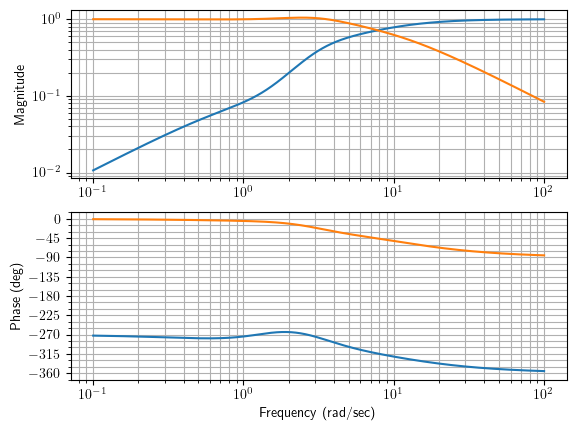

In [38]:
mag,phase,w=ct.bode_plot([S, T])

# Observations

We achieved our objective of designing a Sensitivity function with a bandwidth of $10$ rad/s

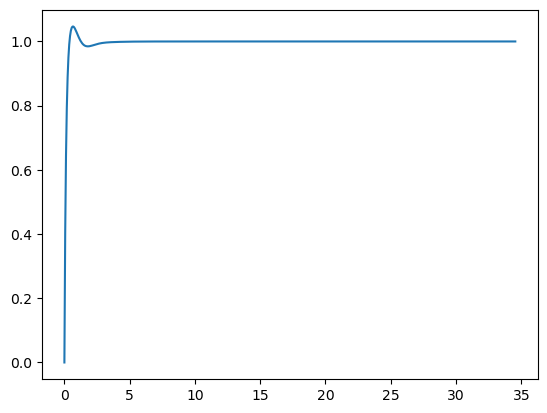

In [67]:
t,y_step = ct.step_response(T)
fig,ax = plt.subplots(1)
ax.plot(t,y_step)

# Example 2

Consider a plant $P(s) = \frac{s + 1}{(s+5)(s^2 + 2s + 2)}$. Suppose that we want the bandwidth of $S(s)$ to be $0.5$ rad/s. Where should we attempt to place the closed loop poles?  

Place $3$ closed loop poles at $-\sqrt{0.25} \pm j\sqrt{0.25}$, and $-0.5$.

In [39]:
# open loop poles -1\pm 1, -5
P = ct.tf([1, 1], [1, 7, 12, 10])

def eval_P_at(s):
    P_at_s = (s+1)/(s**3 + 7*s**2 + 12*s + 10)
    return P_at_s

# desired poles:
a1 = complex(np.sqrt(0.25),np.sqrt(0.25))
a2 = complex(np.sqrt(0.25),-np.sqrt(0.25))
a3 = 0.5

Pa1 = eval_P_at(-a1)
Pa2 = eval_P_at(-a2)
Pa3 = eval_P_at(-a3)

M = np.array([[a1**2*Pa1, -a1*Pa1, Pa1], [a2**2*Pa2, -a2*Pa2, Pa2], [a3**2*Pa3, -a3*Pa3, Pa3]])
b = np.array([[a1], [a2], [a3]])

K_coeff = np.linalg.inv(M)@b

Kd = np.real(K_coeff[0,0])
Kp = np.real(K_coeff[1,0])
Ki = np.real(K_coeff[2,0])

print('Kd = ', Kd)
print('Kp = ', Kp)
print('Ki = ', Ki)

Kd =  11.499999999999993
Kp =  2.999999999999993
Ki =  4.249999999999998


In [40]:

K = ct.tf(Kp, 1) + ct.tf([Kd, 0],1) + ct.tf(Ki,[1, 0])

T = P*K/(1+P*K)
S = 1/(1+P*K)

print(S)
print(T)

closed_loop_poles = np.roots(S.den[0][0])
print('Closed loop poles:')
for pp in closed_loop_poles:
    print(pp)


       s^4 + 7 s^3 + 12 s^2 + 10 s
------------------------------------------
s^4 + 18.5 s^3 + 26.5 s^2 + 17.25 s + 4.25


   11.5 s^7 + 95 s^6 + 246.7 s^5 + 344 s^4 + 261.7 s^3 + 123.5 s^2 + 42.5 s
-------------------------------------------------------------------------------
s^8 + 25.5 s^7 + 168 s^6 + 434.7 s^5 + 628 s^4 + 501.7 s^3 + 223.5 s^2 + 42.5 s

Closed loop poles:
(-17.000000000000014+0j)
(-0.49999999999999967+0.5j)
(-0.49999999999999967-0.5j)
(-0.5000000000000013+0j)


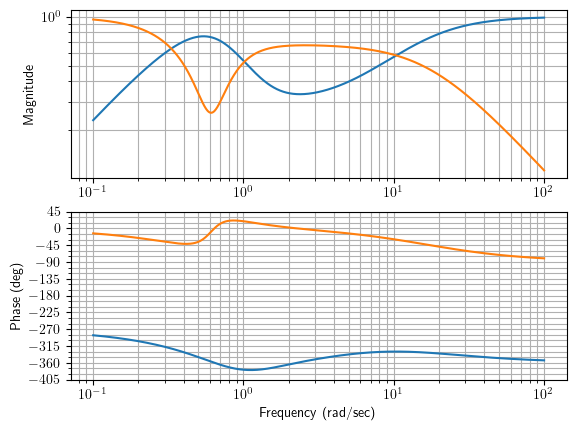

In [41]:
mag,phase,w=ct.bode_plot([S, T])

# Observations

Did not design a very nice Sensitivity Function. Why not? 

# Take a closer look at Sensitivity Function

Let $P(s) = \frac{B_P(s)}{A_P(s)}$ and $K(s) = \frac{B_K(s)}{s}$. Then we can express the sensitivity function as:
$$
\begin{align*}
S(s) &= \frac{1}{1+K(s)P(s)} \\
&= \frac{1}{1 + \frac{B_K(s)}{s}\frac{B_P(s)}{A_P(s)}} \\
&= \frac{sA_P(s)}{s A_P(s) + B_K(s)B_P(s)} \\
&= \frac{s A_{(s)}}{A_{cl}(s)},
\end{align*}
$$
where $A_{cl}$ is the closed loop characteristic polynomial (of which we have designed some of the roots).

# Main observation

- The zeros of $S(s)$ are the poles of the plant $P(s)$. 
- Case 1: we want to design a sensitivity that has bandwidth greater than the largest pole of $P$. Then the largest zero of $S(s)$ will be less than the desired closed-loop poles. This in turn means that "bending" the sensitivity at the desired bandwidth will result in a nice sensitivity curve. This was the situation in Example 1.
- Case 2: we want to design a sensitivity that has bandwidth less than the largest pole of $P$. Then the largest zero of $S(s)$ will be greater than the desired closed-loop poles. This means that $S(s)$ will still bend up, after our desired bandwidth. This is a problem. 

# Conclusion

If the desired bandwidth of the sensitivity function is greater than the largest pole of the plant, then this approach will work very well. 